# DEMO
Demo for our presentation on Enhancing Fairness: Debiasing Word Embeddings based on:

Man is to Computer Programmer as Woman is to Homemaker? Debiasing Word Embeddings
Tolga Bolukbasi, Kai-Wei Chang, James Zou, Venkatesh Saligrama, and Adam Kalai
2016

In this demo we would like to introduce you to debiasing word embeddings. we will focus on gender bias, eventhough of course also other sorts of biases like racial bias should be taken into consideration and could be debiased with this approach.

In [1]:
from utils.wordembedding import WordEmbedding
from utils.util import load_professions, debias
import json

### Load Word Embedding
First we load the word embedding of the w2vNEWS (small version). It is the word embedding proposed by the paper and trained on Google News texts and has a embedding dimension of 300.
Additionally, we load professions.

In [2]:
embedding = WordEmbedding('./data/w2v_gnews_small.txt')

#load professions
professions = load_professions()
profession_words = [p[0] for p in professions]

*** Reading data from ./data/w2v_gnews_small.txt
(26423, 300)
26423 words of dimension 300 : in, for, that, is, ..., Jay, Leroy, Brad, Jermaine


### Visualize Word Embedding
Let us have a quick glance at a visualization of the word embedding. For that, we reduce the word embedding to 2 dimensions to visualize it in the plot. Words with similiar meaning should be closer to each other. We already selected a slice of 100 words that looks somewhat good and for example "issues", "problems", and "problem" are close to each other. Feel free to change the indices to visualize a different batch of words!

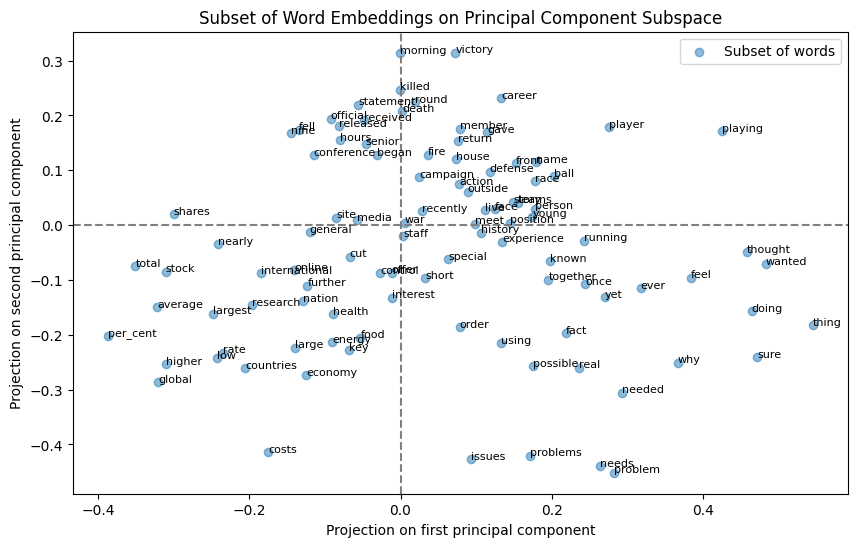

In [3]:
#from_idx and to_idx determine the range of words of the word embedding to visualize
embedding.visualize_word_embedding(from_idx=400, to_idx=500)

### Generating general analogies of "Woman: x :: Man: y"
First we calculate the gender direction (for example ("woman", "man") or ("she", "he")) and with that gained direction we are able to generate analogies of the shape of "Woman" is to x as "Man" is to y.

Have a look at the output and feel free to adjust the parameters of n_analogies or the gender direction itself.

In [4]:
#gender direction (feel free to change word pairs to get different directions)
v_gender = embedding.diff('she', 'he')

#gender analogies
a_gender = embedding.n_analogies(v_gender, topn=100)

for (a, b, _) in a_gender:
    print(f"{a} - {b}")

Computing neighbors
Mean: 10.219732808538016
Median: 7.0
she - he
herself - himself
her - his
woman - man
daughter - son
businesswoman - businessman
girl - boy
actress - actor
chairwoman - chairman
heroine - hero
mother - father
spokeswoman - spokesman
sister - brother
girls - boys
sisters - brothers
queen - king
niece - nephew
councilwoman - councilman
motherhood - fatherhood
women - men
petite - lanky
ovarian_cancer - prostate_cancer
Anne - John
schoolgirl - schoolboy
granddaughter - grandson
aunt - uncle
matriarch - patriarch
twin_sister - twin_brother
mom - dad
lesbian - gay
husband - younger_brother
gal - dude
lady - gentleman
sorority - fraternity
mothers - fathers
grandmother - grandfather
blouse - shirt
soprano - baritone
queens - kings
Jill - Greg
daughters - sons
grandma - grandpa
volleyball - football
diva - superstar
mommy - kid
Sarah - Matthew
hairdresser - barber
softball - baseball
goddess - god
Aisha - Jamal
waitress - waiter
princess - prince
filly - colt
mare - geldin

### Specific analogies
Here we can examine specific analogies, given a seed pair (a, b) and an analogy word c. For example with the seed pair ("man", "woman") and the word "doctor", we would like to see what the result of following analogy would be:
"Man" is to "doctor" as "woman" is to x?

We already entered some examples, but feel free to change the seed_pair words and also the analogy words. Note that for some analogies there is no result found, for one that could be because of the parameters of topn, threshold and max words, but it also could be because we work with a small version of the word embedding.

In [5]:
seed_pair = ['man', 'woman']
analogy_words = ['doctor', 'businessman', 'actor', 'king', 'baseball', 'pilots', 'shopkeeper', 'engineer']

for word in analogy_words:
    print(f"Analogy: {seed_pair[0]} is to {word} as {seed_pair[1]} is to ?")
    a_gender = embedding.specific_analogy(seed_pair[0], seed_pair[1], word, topn=2000, thresh=1, max_words=50000)
    if a_gender:
        for (a, b, _) in a_gender:
            print(f"{a} - {b}")
    else: 
        print("No results found")
    print()

Analogy: man is to doctor as woman is to ?
doctor - midwife

Analogy: man is to businessman as woman is to ?
businessman - businesswoman

Analogy: man is to actor as woman is to ?
actor - actress

Analogy: man is to king as woman is to ?
king - queen

Analogy: man is to baseball as woman is to ?
baseball - softball

Analogy: man is to pilots as woman is to ?
pilots - flight_attendants

Analogy: man is to shopkeeper as woman is to ?
shopkeeper - housewife

Analogy: man is to engineer as woman is to ?
No results found



### Analyzing gender bias of embeddings of professions
In the following we show that professions of the list do have some tendency on the gender direction, where positive values are associated with stereotypical female direction and negative values are associated with stereotypical male direction. (positive / negative direction depends on v_gender, the gender direction).

In [6]:
#profession analysis gender
sp = sorted([(embedding.v(w).dot(v_gender), w) for w in profession_words])

male_associated = sp[0:20]
female_associated = sp[-20:][::-1]

print("Top 20 Professions Most Associated with Stereotypical Male Direction:")
for score, profession in male_associated:
    print(f"{profession:20} {score:.8f}")

print("\nTop 20 Professions Most Associated with Stereotypical Female Direction:")
for score, profession in female_associated:
    print(f"{profession:20} {score:.8f}")

Top 20 Professions Most Associated with Stereotypical Male Direction:
maestro              -0.23798442
statesman            -0.21665451
skipper              -0.20758671
protege              -0.20267202
businessman          -0.20206760
sportsman            -0.19492392
philosopher          -0.18836352
marksman             -0.18073659
captain              -0.17289861
architect            -0.16785558
financier            -0.16702037
warrior              -0.16313638
major_leaguer        -0.15280862
trumpeter            -0.15001443
broadcaster          -0.14718868
magician             -0.14637241
fighter_pilot        -0.14401694
boss                 -0.13782284
industrialist        -0.13718200
pundit               -0.13684885

Top 20 Professions Most Associated with Stereotypical Female Direction:
businesswoman        0.35965404
actress              0.35235140
housewife            0.34036589
homemaker            0.30437970
registered_nurse     0.30426231
nurse                0.28085968
waitr

# DEBIASING:
Now to the debiasing: we first load 3 files given by the authors of the original paper and their repository:
- Definitional Pairs:
    Word Pairs to determine gender direction / gender subspace (["woman", "man"], ["girl", "boy"], ["she", "he"],...)

- Equalize Pairs:
    Words pairs to ensure gender equality in embedding space

- Gender specific seed
    Words that are inherently gender-specific and should not be neutralized

In [7]:
import pandas as pd
from IPython.display import display

#load the data from JSON files
with open('./data/definitional_pairs.json', "r") as f:
    defs = json.load(f)

with open('./data/equalize_pairs.json', "r") as f:
    equalize_pairs = json.load(f)

with open('./data/gender_specific_seed.json', "r") as f:
    gender_specific_words = json.load(f)

#convert definitional pairs to a dataframe
definitional_df = pd.DataFrame(defs, columns=['Word 1', 'Word 2'])

#convert equalize pairs to a dataframe
equalize_df = pd.DataFrame(equalize_pairs, columns=['Word 1', 'Word 2'])

#convert gender-specific words to a dataframe
gender_specific_df = pd.DataFrame(gender_specific_words, columns=['Gender-Specific Words'])

#print the dataframes
print("Definitional Pairs:")
display(definitional_df)

print("\nEqualize Pairs (first 10):")
display(equalize_df.head(10))

print("\nGender-Specific Words (first 10):")
display(gender_specific_df.head(10))

Definitional Pairs:


,Word 1,Word 2
0,woman,man
1,girl,boy
2,she,he
3,mother,father
4,daughter,son
5,gal,guy
6,female,male
7,her,his
8,herself,himself
9,Mary,John



Equalize Pairs (first 10):


,Word 1,Word 2
0,monastery,convent
1,spokesman,spokeswoman
2,Catholic_priest,nun
3,Dad,Mom
4,Men,Women
5,councilman,councilwoman
6,grandpa,grandma
7,grandsons,granddaughters
8,prostate_cancer,ovarian_cancer
9,testosterone,estrogen



Gender-Specific Words (first 10):


,Gender-Specific Words
0,actress
1,actresses
2,aunt
3,aunts
4,bachelor
5,ballerina
6,barbershop
7,baritone
8,beard
9,beards


### Debias Embedding
Now we will copy our embedding and debias it, using the above loaded gender specific words, definitional pairs and equalize pairs. We also plot the top 10 principal components of the definitional gender pairs and their explained variance. One can see that most of the variance is explained by one component, which will be the gender direction.

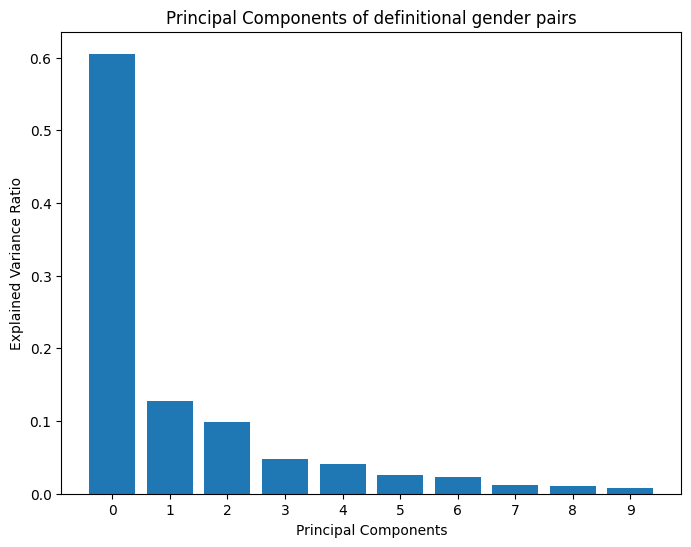

26423 words of dimension 300 : in, for, that, is, ..., Jay, Leroy, Brad, Jermaine
{('Uncle', 'Aunt'), ('MALE', 'FEMALE'), ('prince', 'princess'), ('His', 'Her'), ('Gentleman', 'Lady'), ('MONASTERY', 'CONVENT'), ('chairman', 'chairwoman'), ('TESTOSTERONE', 'ESTROGEN'), ('HIMSELF', 'HERSELF'), ('MALES', 'FEMALES'), ('CHAIRMAN', 'CHAIRWOMAN'), ('BROTHER', 'SISTER'), ('dads', 'moms'), ('Boys', 'Girls'), ('monastery', 'convent'), ('himself', 'herself'), ('Grandfather', 'Grandmother'), ('GENTLEMAN', 'LADY'), ('Father', 'Mother'), ('MEN', 'WOMEN'), ('Colt', 'Filly'), ('HIS', 'HER'), ('SON', 'DAUGHTER'), ('BUSINESSMAN', 'BUSINESSWOMAN'), ('Himself', 'Herself'), ('SONS', 'DAUGHTERS'), ('DADS', 'MOMS'), ('gelding', 'mare'), ('father', 'mother'), ('Congressman', 'Congresswoman'), ('congressman', 'congresswoman'), ('DAD', 'MOM'), ('FELLA', 'GRANNY'), ('SPOKESMAN', 'SPOKESWOMAN'), ('KING', 'QUEEN'), ('twin_brother', 'twin_sister'), ('fella', 'granny'), ('BROTHERS', 'SISTERS'), ('grandfather', 'gran

In [8]:
import copy
#copy of embedding that will be debiased
debiased_embedding = copy.deepcopy(embedding)
debias(debiased_embedding, gender_specific_words, defs, equalize_pairs)

### Analyzing gender bias of debiased embeddings of professions
We will again have a look at the professions and their tendency on the gender direction, where we should see that the distribution is less critical, eventhough not particularly perfect:

In [9]:
#profession analysis gender
sp = sorted([(debiased_embedding.v(w).dot(v_gender), w) for w in profession_words])

male_associated = sp[0:20]
female_associated = sp[-20:][::-1]

print("Top 20 Professions Most Associated with Stereotypical Male Direction:")
for score, profession in male_associated:
    print(f"{profession:20} {score:.8f}")

print("\nTop 20 Professions Most Associated with Stereotypical Female Direction:")
for score, profession in female_associated:
    print(f"{profession:20} {score:.8f}")

Top 20 Professions Most Associated with Stereotypical Male Direction:
congressman          -0.41963249
businessman          -0.40675849
councilman           -0.32398775
dad                  -0.30967084
statesman            -0.21665451
salesman             -0.11345412
monk                 -0.07300486
handyman             -0.07216395
minister             -0.04946825
archbishop           -0.04358387
bishop               -0.04020722
commissioner         -0.03833248
surgeon              -0.03572437
trader               -0.03313400
observer             -0.03237721
neurosurgeon         -0.03209583
priest               -0.03145010
skipper              -0.03113396
lawmaker             -0.02965916
commander            -0.02951123

Top 20 Professions Most Associated with Stereotypical Female Direction:
businesswoman        0.41210839
actress              0.35235140
housewife            0.34036583
waitress             0.27540290
ballerina            0.25276467
nun                  0.24125956
maid 

### Generating debiased analogies
If we again generate analogies with our gender direction v, we should get a debiased, less sexist word embedding.
Have a look at the generated analogies and see for yourself!

In [10]:
#gender analogies
a_gender = debiased_embedding.n_analogies(v_gender, topn=100)

for (a, b, _) in a_gender:
    print(f"{a} - {b}")

Computing neighbors
Mean: 10.218597434053665
Median: 7.0
she - he
councilwoman - councilman
girls - boys
grandmother - grandfather
mare - gelding
estrogen - testosterone
queens - kings
ex_boyfriend - ex_girlfriend
females - males
mothers - fathers
schoolgirl - schoolboy
filly - colt
ladies - gentlemen
moms - dads
sister - brother
twin_sister - twin_brother
husbands - wives
grandma - grandpa
mother - father
granddaughter - grandson
daughters - sons
niece - nephew
granddaughters - grandsons
sisters - brothers
gals - dudes
queen - king
spokeswoman - spokesman
aunt - uncle
herself - himself
ovarian_cancer - prostate_cancer
chairwoman - chairman
businesswoman - businessman
woman - man
girl - boy
sorority - fraternity
mom - dad
motherhood - fatherhood
convent - monastery
congresswoman - congressman
women - men
princess - prince
daughter - son
female - male
her - his
actress - actor
lesbian - gay
compatriot - countryman
husband - younger_brother
gal - dude
hers - theirs
heroine - protagonist


### Specific analogies
It should be especially clear with the specific analogies we generated earlier. If we now again generate analogies we should see that some of them, mostly those that were somewhat biased, are not leading to a result anymore. The word embedding is definitely a bit less biased now!

In [11]:
seed_pair = ['man', 'woman']
analogy_words = ['doctor', 'businessman', 'actor', 'king', 'baseball', 'pilots', 'shopkeeper', 'engineer']

for word in analogy_words:
    print(f"Analogy: {seed_pair[0]} is to {word} as {seed_pair[1]} is to ?")
    a_gender = debiased_embedding.specific_analogy(seed_pair[0], seed_pair[1], word, topn=2000, thresh=1, max_words=50000)
    if a_gender:
        for (a, b, _) in a_gender:
            print(f"{a} - {b}")
    else: 
        print("No results found")
    print()

Analogy: man is to doctor as woman is to ?
No results found

Analogy: man is to businessman as woman is to ?
businessman - businesswoman

Analogy: man is to actor as woman is to ?
actor - actress

Analogy: man is to king as woman is to ?
king - queen

Analogy: man is to baseball as woman is to ?
No results found

Analogy: man is to pilots as woman is to ?
No results found

Analogy: man is to shopkeeper as woman is to ?
No results found

Analogy: man is to engineer as woman is to ?
No results found

